In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [7]:
arabi_genes = pd.read_csv('/data/passala/Module_paper_data/Sorghum_rice_heat_stress/sorg_genes_de_results.csv', index_col= 0)
arabi_ortho = pd.read_csv('/data/passala/Module_paper_data/Sorghum_rice_heat_stress/sorg_ortho_de_results.csv', index_col= 0)
tomato_genes = pd.read_csv('/data/passala/Module_paper_data/Sorghum_rice_heat_stress/rice_genes_de_results.csv', index_col= 0)
tomato_ortho = pd.read_csv('/data/passala/Module_paper_data/Sorghum_rice_heat_stress/rice_ortho_de_results.csv', index_col= 0)

In [8]:
tomato_ortho

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
1004at3193,36.931248,-0.680521,0.530139,-1.283665,1.992591e-01,2.946441e-01
10055at3193,225.241606,2.655652,0.258142,10.287573,8.017192e-25,1.260239e-23
10092at3193,1451.308111,-0.220261,0.120092,-1.834098,6.663942e-02,1.182717e-01
10147at3193,156.570198,-0.045041,0.270481,-0.166521,8.677473e-01,9.090237e-01
10228at3193,2513.973891,0.008648,0.107446,0.080483,9.358532e-01,9.584984e-01
...,...,...,...,...,...,...
98658at3193,432.744715,-3.139438,1.031993,-3.042110,2.349258e-03,6.281822e-03
9877at3193,4699.990916,0.519326,0.097891,5.305165,1.125712e-07,5.848983e-07
9919at3193,694.739329,-0.494977,0.152735,-3.240765,1.192096e-03,3.417183e-03
9942at3193,1800.081493,0.105290,0.113129,0.930710,3.520037e-01,4.643966e-01


In [9]:
trimmed_tomato_ortho = tomato_ortho.loc[tomato_ortho.index.isin(arabi_ortho.index)]
trimmed_arabi_ortho = arabi_ortho.loc[arabi_ortho.index.isin(trimmed_tomato_ortho.index)]


(array([-6., -4., -2.,  0.,  2.,  4.,  6.,  8., 10., 12.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

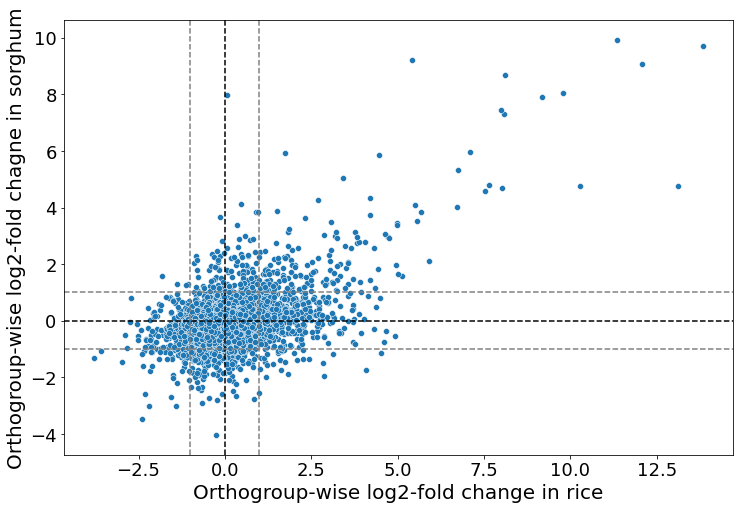

In [10]:
fig, ax = plt.subplots(figsize = (12,8))
fig.patch.set_facecolor('white')
sns.scatterplot(x =trimmed_tomato_ortho['log2FoldChange'], y = trimmed_arabi_ortho['log2FoldChange'])
plt.axvline(0, color="k", linestyle="--")
plt.axhline(0, color="k", linestyle="--")
plt.axvline(1, color="grey", linestyle="--")
plt.axhline(1, color="grey", linestyle="--")
plt.axvline(-1, color="grey", linestyle="--")
plt.axhline(-1, color="grey", linestyle="--")
plt.xlabel("Orthogroup-wise log2-fold change in rice", fontsize = 20)
plt.ylabel("Orthogroup-wise log2-fold chagne in sorghum", fontsize = 20)
plt.xticks(fontsize = 18,)
plt.yticks(fontsize = 18)

In [11]:
stats.spearmanr(a=trimmed_tomato_ortho['log2FoldChange'], b = trimmed_arabi_ortho['log2FoldChange'] )

SpearmanrResult(correlation=0.3154272234442311, pvalue=1.1436533633240163e-148)

In [12]:
arabidopsis_tomato_nm = pd.read_csv('/data/passala/OrthoDB_data/V_11_NM_with_NCBI/rice_jp_to_sorghum_ortholog_NM.csv')

In [13]:
arabidopsis_tomato_nm

,rice_jp OrthoGene,sorghum OrthoGene,Orthogroup,rice_jp Symbol,sorghum Symbol
0,39947_0:00057a,4558_0:000f6e,10051at3193,LOC107276016,LOC8080530
1,39947_0:000a9c,4558_0:000f6e,10051at3193,Os01g0596100,LOC8080530
2,39947_0:00057a,4558_0:0014a0,10051at3193,LOC107276016,LOC8084266
3,39947_0:000a9c,4558_0:0014a0,10051at3193,Os01g0596100,LOC8084266
4,39947_0:00057a,4558_0:002bd3,10051at3193,LOC107276016,LOC8082194
...,...,...,...,...,...
62590,39947_0:000ecd,4558_0:002462,9959at3193,LOC4327414,LOC8085434
62591,39947_0:00280c,4558_0:002462,9959at3193,LOC4334580,LOC8085434
62592,39947_0:000300,4558_0:00615d,9959at3193,Os01g0834500,LOC8072558
62593,39947_0:000ecd,4558_0:00615d,9959at3193,LOC4327414,LOC8072558


In [14]:
arabidopsis_tomato_nm = arabidopsis_tomato_nm.drop_duplicates(subset = 'sorghum Symbol')
arabidopsis_tomato_nm = arabidopsis_tomato_nm.drop_duplicates(subset = 'rice_jp Symbol')
arabidopsis_tomato_nm

,rice_jp OrthoGene,sorghum OrthoGene,Orthogroup,rice_jp Symbol,sorghum Symbol
0,39947_0:00057a,4558_0:000f6e,10051at3193,LOC107276016,LOC8080530
8,39947_0:0046ca,4558_0:0008e8,10054at3193,LOC112939581,LOC8082146
10,39947_0:003ade,4558_0:00614a,10055at3193,Os05g0588700,LOC8066546
11,39947_0:001c36,4558_0:00583b,10091at3193,LOC4334784,LOC8063290
12,39947_0:0033f9,4558_0:0009c3,10092at3193,Os05g0333200,LOC8082019
...,...,...,...,...,...
62567,39947_0:00158e,4558_0:003037,9877at3193,Os02g0232400,LOC8073811
62568,39947_0:000faa,4558_0:00377f,9917at3193,LOC4329688,LOC110434960
62569,39947_0:00335b,4558_0:0063a4,9919at3193,Os05g0519500,LOC8082990
62570,39947_0:0020d4,4558_0:001021,9942at3193,Os03g0277000,LOC8063216


In [15]:
arabi_genes_trimmed = arabi_genes.merge(how = 'inner', left_index= True, right = arabidopsis_tomato_nm[['rice_jp Symbol','sorghum Symbol']], right_on= 'sorghum Symbol')
arabi_genes_trimmed = arabi_genes_trimmed.drop_duplicates(subset = 'rice_jp Symbol', keep = False)
arabi_genes_trimmed

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,rice_jp Symbol,sorghum Symbol
51203,111.143068,-0.359088,0.526412,-0.682143,0.495149,0.911031,Os02g0810500,LOC8059226
36029,191.033209,-0.048445,0.324807,-0.149151,0.881435,0.987928,Os11g0588300,LOC8059547
61999,1045.160544,-0.067098,0.267529,-0.250807,0.801964,0.978998,Os03g0862100,LOC8059227
49429,215.516737,-0.157237,0.402017,-0.391121,0.695708,0.961580,LOC4334877,LOC8061368
31472,16.783830,-1.097915,0.637489,-1.722250,0.085024,0.502541,Os03g0861100,LOC8059230
...,...,...,...,...,...,...,...,...
15459,126.359399,-0.029667,0.322751,-0.091920,0.926761,0.992976,LOC9271593,LOC8066399
8559,60.111466,0.300048,0.380979,0.787571,0.430948,0.883855,LOC4342152,LOC8066402
4195,127.682700,-0.603020,0.322104,-1.872130,0.061189,0.429550,Os06g0731400,LOC8069251
9262,279.675155,2.815426,0.718926,3.916153,0.000090,0.004558,P58B,LOC8155365


In [16]:
tomato_genes_trimmed = tomato_genes.merge(how = 'inner', left_index= True, right = arabidopsis_tomato_nm[['rice_jp Symbol','sorghum Symbol']], right_on= 'rice_jp Symbol')
tomato_genes_trimmed = tomato_genes_trimmed.drop_duplicates(subset = 'sorghum Symbol', keep = False)
tomato_genes_trimmed

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,rice_jp Symbol,sorghum Symbol
5912,1173.668182,-0.452103,0.132206,-3.419692,6.269210e-04,2.071962e-03,Os01g0100100,LOC8072386
16044,367.754989,0.446220,0.190654,2.340475,1.925921e-02,4.324253e-02,Os01g0100600,LOC8082284
36891,1313.645813,-0.097851,0.131200,-0.745818,4.557771e-01,5.792339e-01,Os01g0100700,LOC110433540
48641,2395.431575,-0.068746,0.117529,-0.584931,5.585940e-01,6.718705e-01,Os01g0100900,LOC8072381
8567,50.145130,-0.121046,0.450070,-0.268948,7.879694e-01,8.563272e-01,Os01g0101300,LOC110430034
...,...,...,...,...,...,...,...,...
9856,637.354476,0.626580,0.156417,4.005821,6.180248e-05,2.464041e-04,Os12g0639100,LOC8072879
21104,102.387838,-0.635645,0.341957,-1.858843,6.304946e-02,1.195543e-01,Os12g0639800,LOC8072882
26059,5241.230952,-0.340264,0.113539,-2.996882,2.727565e-03,7.774776e-03,Os12g0640600,LOC8080590
59910,3525.819092,0.748280,0.117153,6.387207,1.689433e-10,1.314842e-09,Os12g0641100,LOC8065267


In [17]:
tomato_genes_trimmed

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,rice_jp Symbol,sorghum Symbol
5912,1173.668182,-0.452103,0.132206,-3.419692,6.269210e-04,2.071962e-03,Os01g0100100,LOC8072386
16044,367.754989,0.446220,0.190654,2.340475,1.925921e-02,4.324253e-02,Os01g0100600,LOC8082284
36891,1313.645813,-0.097851,0.131200,-0.745818,4.557771e-01,5.792339e-01,Os01g0100700,LOC110433540
48641,2395.431575,-0.068746,0.117529,-0.584931,5.585940e-01,6.718705e-01,Os01g0100900,LOC8072381
8567,50.145130,-0.121046,0.450070,-0.268948,7.879694e-01,8.563272e-01,Os01g0101300,LOC110430034
...,...,...,...,...,...,...,...,...
9856,637.354476,0.626580,0.156417,4.005821,6.180248e-05,2.464041e-04,Os12g0639100,LOC8072879
21104,102.387838,-0.635645,0.341957,-1.858843,6.304946e-02,1.195543e-01,Os12g0639800,LOC8072882
26059,5241.230952,-0.340264,0.113539,-2.996882,2.727565e-03,7.774776e-03,Os12g0640600,LOC8080590
59910,3525.819092,0.748280,0.117153,6.387207,1.689433e-10,1.314842e-09,Os12g0641100,LOC8065267


In [18]:
arabi_genes_trimmed = arabi_genes_trimmed.loc[arabi_genes_trimmed['sorghum Symbol'].isin(tomato_genes_trimmed['sorghum Symbol'])]
tomato_genes_trimmed = tomato_genes_trimmed.loc[tomato_genes_trimmed['rice_jp Symbol'].isin(arabi_genes_trimmed['rice_jp Symbol'])]


In [19]:
tomato_genes_trimmed

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,rice_jp Symbol,sorghum Symbol
5912,1173.668182,-0.452103,0.132206,-3.419692,6.269210e-04,2.071962e-03,Os01g0100100,LOC8072386
16044,367.754989,0.446220,0.190654,2.340475,1.925921e-02,4.324253e-02,Os01g0100600,LOC8082284
36891,1313.645813,-0.097851,0.131200,-0.745818,4.557771e-01,5.792339e-01,Os01g0100700,LOC110433540
48641,2395.431575,-0.068746,0.117529,-0.584931,5.585940e-01,6.718705e-01,Os01g0100900,LOC8072381
8567,50.145130,-0.121046,0.450070,-0.268948,7.879694e-01,8.563272e-01,Os01g0101300,LOC110430034
...,...,...,...,...,...,...,...,...
62564,2771.755898,0.472402,0.111221,4.247422,2.162447e-05,9.282904e-05,Os12g0638900,LOC8072878
9856,637.354476,0.626580,0.156417,4.005821,6.180248e-05,2.464041e-04,Os12g0639100,LOC8072879
26059,5241.230952,-0.340264,0.113539,-2.996882,2.727565e-03,7.774776e-03,Os12g0640600,LOC8080590
59910,3525.819092,0.748280,0.117153,6.387207,1.689433e-10,1.314842e-09,Os12g0641100,LOC8065267


In [20]:
tomato_genes_trimmed = (tomato_genes_trimmed.set_index('sorghum Symbol')
          .reindex(arabi_genes_trimmed.set_index('sorghum Symbol').index)
          .reset_index()
       )

In [21]:
tomato_genes_trimmed

,sorghum Symbol,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,rice_jp Symbol
0,LOC8059226,62.447078,0.103998,0.411960,0.252448,8.006950e-01,0.866219,Os02g0810500
1,LOC8059547,1538.660267,0.663680,0.133940,4.955070,7.230428e-07,0.000004,Os11g0588300
2,LOC8059227,1897.679935,-0.057657,0.117777,-0.489545,6.244560e-01,0.727949,Os03g0862100
3,LOC8059230,1871.228232,-0.511219,0.128945,-3.964635,7.350822e-05,0.000289,Os03g0861100
4,LOC110431639,873.627704,0.128227,0.140750,0.911031,3.622792e-01,0.487686,Os03g0860900
...,...,...,...,...,...,...,...,...
5279,LOC8069245,457.941653,-0.234952,0.177405,-1.324384,1.853756e-01,0.289357,Os06g0730800
5280,LOC110430941,2490.380362,0.400895,0.117644,3.407689,6.551557e-04,0.002157,Os02g0100700
5281,LOC8069247,3816.075085,0.525012,0.106133,4.946750,7.546286e-07,0.000004,Os02g0827300
5282,LOC8069251,1133.517120,0.471572,0.132418,3.561237,3.691111e-04,0.001277,Os06g0731400


In [25]:
arabi_genes_trimmed = arabi_genes_trimmed.reset_index()

(array([-8., -6., -4., -2.,  0.,  2.,  4.,  6.,  8., 10., 12.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

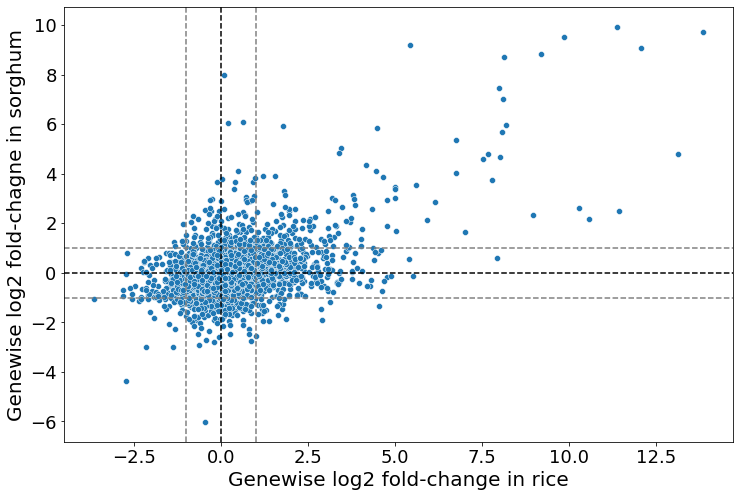

In [26]:
fig, ax = plt.subplots(figsize = (12,8))
fig.patch.set_facecolor('white')
sns.scatterplot(x =tomato_genes_trimmed['log2FoldChange'], y = arabi_genes_trimmed['log2FoldChange'])
plt.axvline(0, color="k", linestyle="--")
plt.axhline(0, color="k", linestyle="--")
plt.axvline(1, color="grey", linestyle="--")
plt.axhline(1, color="grey", linestyle="--")
plt.axvline(-1, color="grey", linestyle="--")
plt.axhline(-1, color="grey", linestyle="--")
plt.xlabel("Genewise log2 fold-change in rice", fontsize = 20)
plt.ylabel("Genewise log2 fold-chagne in sorghum", fontsize = 20)
plt.xticks(fontsize = 18,)
plt.yticks(fontsize = 18)

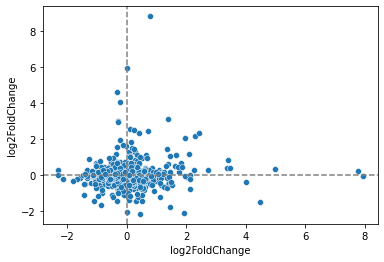

In [24]:
sns.scatterplot(x =tomato_genes_trimmed['log2FoldChange'], y = arabi_genes_trimmed['log2FoldChange'])
plt.axvline(0, color="grey", linestyle="--")
plt.axhline(0, color="grey", linestyle="--")

In [76]:
stats.spearmanr(a=tomato_genes_trimmed['log2FoldChange'], b = arabi_genes_trimmed['log2FoldChange'] )

SignificanceResult(statistic=0.16998724263065582, pvalue=5.557071864182146e-51)

In [77]:
down = tomato_genes_trimmed[
    (tomato_genes_trimmed["log2FoldChange"] <= -2) & (tomato_genes_trimmed["padj"] <= 0.001)
]
up = tomato_genes_trimmed[
    (tomato_genes_trimmed["log2FoldChange"] >= 2) & (tomato_genes_trimmed["padj"] <= 0.001)
]
down_arabi = arabi_genes_trimmed[
    (arabi_genes_trimmed["log2FoldChange"] <= -2)
    & (arabi_genes_trimmed["padj"] <= 0.001)
]
up_arabi = arabi_genes_trimmed[
    (arabi_genes_trimmed["log2FoldChange"] >= 2) & (arabi_genes_trimmed["padj"] <= 0.001)
]

In [84]:
down_arabi_ortho = trimmed_arabi_ortho[
    (trimmed_arabi_ortho["log2FoldChange"] <= -2)
    & (trimmed_arabi_ortho["padj"] <= 0.001)
]
up_arabi_ortho = trimmed_arabi_ortho[
    (trimmed_arabi_ortho["log2FoldChange"] >= 2) & (trimmed_arabi_ortho["padj"] <= 0.001)]

down_ortho = trimmed_tomato_ortho[
    (trimmed_tomato_ortho["log2FoldChange"] <= -2) & (trimmed_tomato_ortho["padj"] <= 0.001)
]
up_ortho = trimmed_tomato_ortho[
    (trimmed_tomato_ortho["log2FoldChange"] >= 2) & (trimmed_tomato_ortho["padj"] <= 0.001)
]

In [89]:
len(up_arabi_ortho.merge(how = "inner", right_index = True, left_index= True, right = up_ortho))

32

In [86]:
up_ortho

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
10488at3193,52.714341,3.370811,0.479025,7.036822,1.966743e-12,1.061378e-11
11017at3193,51.827406,3.575398,0.513246,6.966247,3.255071e-12,1.718912e-11
110288at3193,2128.608223,2.203703,0.162992,13.520321,1.186568e-41,3.920125e-40
110291at3193,2788.444150,2.899573,0.259505,11.173492,5.497629e-29,9.039025e-28
110343at3193,304.120376,3.624832,0.235374,15.400305,1.628999e-53,9.112053e-52
...,...,...,...,...,...,...
889664at3193,190.038296,2.598525,0.223327,11.635538,2.718709e-31,5.042490e-30
889948at3193,494.261923,3.276030,0.188725,17.358789,1.692554e-67,1.672307e-65
890015at3193,231.882582,2.405092,0.238361,10.090105,6.110388e-24,7.573156e-23
9557at3193,351.097368,2.153510,0.180711,11.916898,9.664018e-33,1.949771e-31


In [85]:
up_arabi_ortho

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Locus,,,,,,
112319at3193,46.429911,2.189897,0.430789,5.083459,3.706227e-07,4.818095e-06
114038at3193,1593.705104,6.541322,0.484945,13.488783,1.820817e-41,1.182138e-38
114515at3193,1533.063783,5.641658,0.328830,17.156747,5.596189e-66,1.544128e-62
114666at3193,70.035145,2.159363,0.342366,6.307183,2.841591e-10,7.213961e-09
117013at3193,6275.816200,2.783008,0.147893,18.817687,5.409497e-79,2.985231e-75
...,...,...,...,...,...,...
888729at3193,1128.091715,2.465255,0.225902,10.912954,9.995425e-28,2.081500e-25
888811at3193,68.681874,2.301733,0.515129,4.468269,7.885509e-06,6.973747e-05
889278at3193,6791.657344,2.063813,0.493041,4.185885,2.840570e-05,2.097082e-04


In [80]:
up

,arabidopsis Symbol,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,tomato Symbol
13,AT1G01240,773.081084,3.520915,0.253350,13.897441,6.564710e-44,2.675410e-42,LOC101256522
15,AT1G01290,30.686129,3.373121,0.548537,6.149301,7.782526e-10,3.477970e-09,LOC101247025
16,AT1G01300,395.276457,3.521809,0.215713,16.326350,6.410655e-60,5.025135e-58,LOC101254425
69,AT1G02300,1966.547707,2.077465,0.166248,12.496210,7.829576e-36,2.127266e-34,LOC101251744
93,AT1G02960,32.808280,3.367007,0.571278,5.893813,3.773834e-09,1.559744e-08,LOC101258897
...,...,...,...,...,...,...,...,...
7659,AT5G66030,700.040727,2.350113,0.184598,12.730958,3.979269e-37,1.152549e-35,LOC101254258
7660,AT5G66050,688.180123,4.720131,0.313008,15.079905,2.195843e-51,1.229472e-49,LOC101247280
7672,AT5G66540,272.875924,2.031807,0.289682,7.013925,2.317239e-12,1.329363e-11,LOC101253879
7673,AT5G66590,579.079400,2.223749,0.307813,7.224353,5.034947e-13,3.052308e-12,LOC101257731


In [90]:
up_arabi

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,tomato Symbol,arabidopsis Symbol
37410,1704.703924,2.273296,0.226605,10.031959,1.103058e-23,1.623164e-21,LOC101251744,AT1G02300
46632,244.041301,4.909129,0.676055,7.261436,3.830035e-13,1.623916e-11,LOC101256498,AT1G03070
14336,231.147693,2.522209,0.449622,5.609616,2.027762e-08,3.529637e-07,LOC101267058,AT1G03360
52742,272.881762,4.077672,0.438625,9.296489,1.451593e-20,1.559438e-18,LOC101244780,AT1G03470
38408,427.962919,2.323308,0.354202,6.559274,5.407028e-11,1.564999e-09,LOC101248918,AT1G04620
...,...,...,...,...,...,...,...,...
51095,352.905914,2.092255,0.297903,7.023265,2.167433e-12,8.127177e-11,LOC101266226,AT5G58370
43879,431.894437,3.028377,0.377604,8.019988,1.057555e-15,6.475122e-14,LOC101265201,AT5G60040
28383,1486.612708,2.066535,0.256095,8.069418,7.063405e-16,4.465245e-14,LOC101259425,AT5G61380
16939,43.017272,2.709623,0.500485,5.413991,6.163523e-08,9.602265e-07,LOC101265213,AT5G62370


In [82]:
up_arabi.merge(how = "inner", on = 'arabidopsis Symbol', right = up)

,baseMean_x,log2FoldChange_x,lfcSE_x,stat_x,pvalue_x,padj_x,tomato Symbol_x,arabidopsis Symbol,baseMean_y,log2FoldChange_y,lfcSE_y,stat_y,pvalue_y,padj_y,tomato Symbol_y
0,1704.703924,2.273296,0.226605,10.031959,1.103058e-23,1.623164e-21,LOC101251744,AT1G02300,1966.547707,2.077465,0.166248,12.496210,7.829576e-36,2.127266e-34,LOC101251744
1,231.147693,2.522209,0.449622,5.609616,2.027762e-08,3.529637e-07,LOC101267058,AT1G03360,85.080935,2.699202,0.411189,6.564390,5.224628e-11,2.619566e-10,LOC101267058
2,401.994829,3.122644,0.242442,12.879967,5.836084e-38,2.322629e-35,LOC101255183,AT1G15510,120.618031,2.120185,0.341672,6.205326,5.458366e-10,2.485135e-09,LOC101255183
3,1760.048535,4.254156,0.291552,14.591391,3.186328e-48,2.936621e-45,LOC101255185,AT1G16030,18443.123120,2.455365,0.650977,3.771815,1.620643e-04,3.705332e-04,LOC101255185
4,2471.881822,2.312580,0.490882,4.711073,2.464156e-06,2.566915e-05,LOC101258429,AT1G28330,5326.247786,3.191949,0.300080,10.636989,2.005040e-26,3.162229e-25,LOC101258429
5,69.046406,2.340967,0.540501,4.331110,1.483596e-05,1.217397e-04,LOC101257826,AT1G30960,203.148052,2.427976,0.240163,10.109688,5.004351e-24,6.788302e-23,LOC101257826
6,316.908410,2.510030,0.251559,9.977910,1.904357e-23,2.733377e-21,LOC101244367,AT1G48460,119.503515,2.786809,0.383479,7.267182,3.670655e-13,2.248657e-12,LOC101244367
7,1164.064943,2.794628,0.526201,5.310950,1.090554e-07,1.591390e-06,LOC101256536,AT1G59860,627.619958,3.931761,1.058001,3.716215,2.022296e-04,4.556350e-04,LOC101256536
8,175.944756,6.525599,0.631996,10.325375,5.410687e-25,8.772828e-23,LOC101256908,AT1G68050,636.987165,5.521131,0.434430,12.708905,5.276819e-37,1.509383e-35,LOC101256908
9,64.288553,2.746667,0.456799,6.012862,1.822759e-09,3.935676e-08,LOC101262206,AT1G68930,46.801826,5.570382,0.752398,7.403507,1.326338e-13,8.560779e-13,LOC101262206
